### An example showing the plot_calibration_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `calibration_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_calibration_curve` method.

In [1]:
import numpy as np
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.5.dev0+git.20250211.6f1a9e0'

In [2]:
# Load the data
X, y = make_classification(
	n_samples=100000,
	n_features=20,
	n_informative=4,
	n_redundant=2,
	n_repeated=0,
	n_classes=3,
	n_clusters_per_class=2,
	random_state=0,
)
X_train, y_train, X_val, y_val = X[:1000], y[:1000], X[1000:], y[1000:]

In [12]:
# Create an instance of the LogisticRegression
lr_probas = (
	LogisticRegression(solver='liblinear', max_iter=int(1e5), random_state=0)
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_val)
svc_scores = LinearSVC().fit(X_train, y_train).decision_function(X_val)
svc_isotonic = (
	CalibratedClassifierCV(LinearSVC(), cv=2, method='isotonic')
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
svc_sigmoid = (
	CalibratedClassifierCV(LinearSVC(), cv=2, method='sigmoid')
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
rf_probas = (
	RandomForestClassifier(random_state=0).fit(X_train, y_train).predict_proba(X_val)
)

/opt/conda/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppr

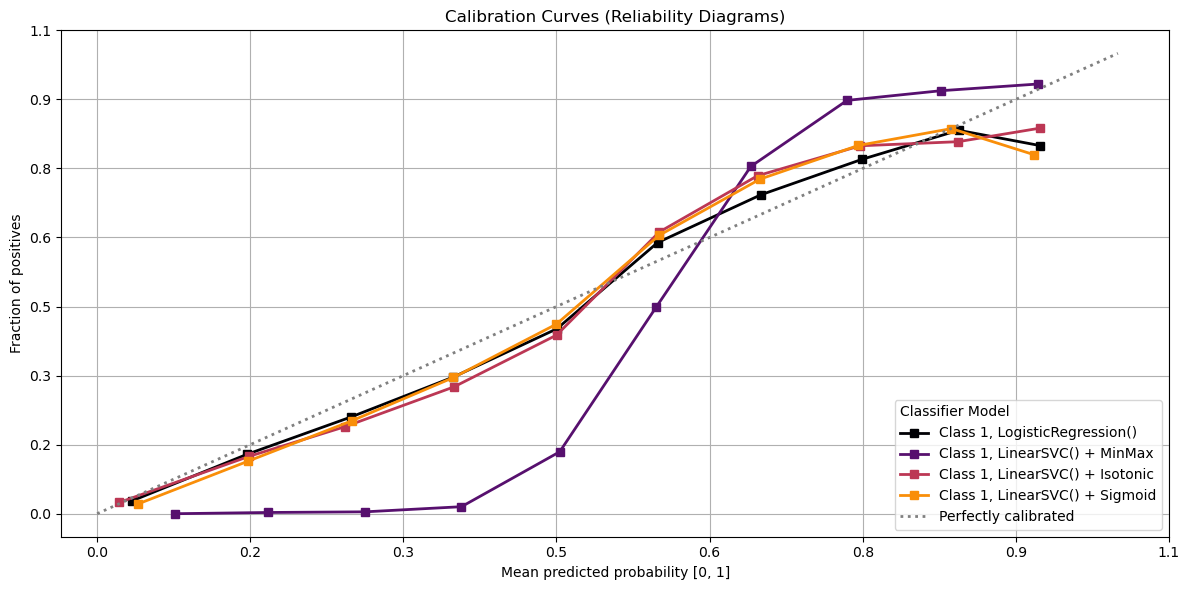

In [13]:
probas_dict = {
	LogisticRegression(): lr_probas,
	# GaussianNB(): nb_probas,
	'LinearSVC() + MinMax': svc_scores,
	'LinearSVC() + Isotonic': svc_isotonic,
	'LinearSVC() + Sigmoid': svc_sigmoid,
	# RandomForestClassifier(): rf_probas,
}
# Plot!
fig, ax = plt.subplots(figsize=(12, 6))
ax = sp.metrics.plot_calibration(
	y_val, y_probas_list=probas_dict.values(), estimator_names=probas_dict.keys(), ax=ax
);

In [14]:
# Load the data
X, y = make_classification(
	n_samples=100000,
	n_features=20,
	n_informative=4,
	n_redundant=2,
	n_repeated=0,
	n_classes=3,
	n_clusters_per_class=2,
	random_state=0,
)
X_train, y_train, X_val, y_val = X[:1000], y[:1000], X[1000:], y[1000:]

In [9]:
# Create an instance of the LogisticRegression
lr_probas = (
	LogisticRegression(max_iter=int(1e5), random_state=0)
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
nb_probas = GaussianNB().fit(X_train, y_train).predict_proba(X_val)
svc_scores = LinearSVC().fit(X_train, y_train).decision_function(X_val)
svc_isotonic = (
	CalibratedClassifierCV(LinearSVC(), cv=2, method='isotonic')
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
svc_sigmoid = (
	CalibratedClassifierCV(LinearSVC(), cv=2, method='sigmoid')
	.fit(X_train, y_train)
	.predict_proba(X_val)
)
rf_probas = (
	RandomForestClassifier(random_state=0).fit(X_train, y_train).predict_proba(X_val)
)

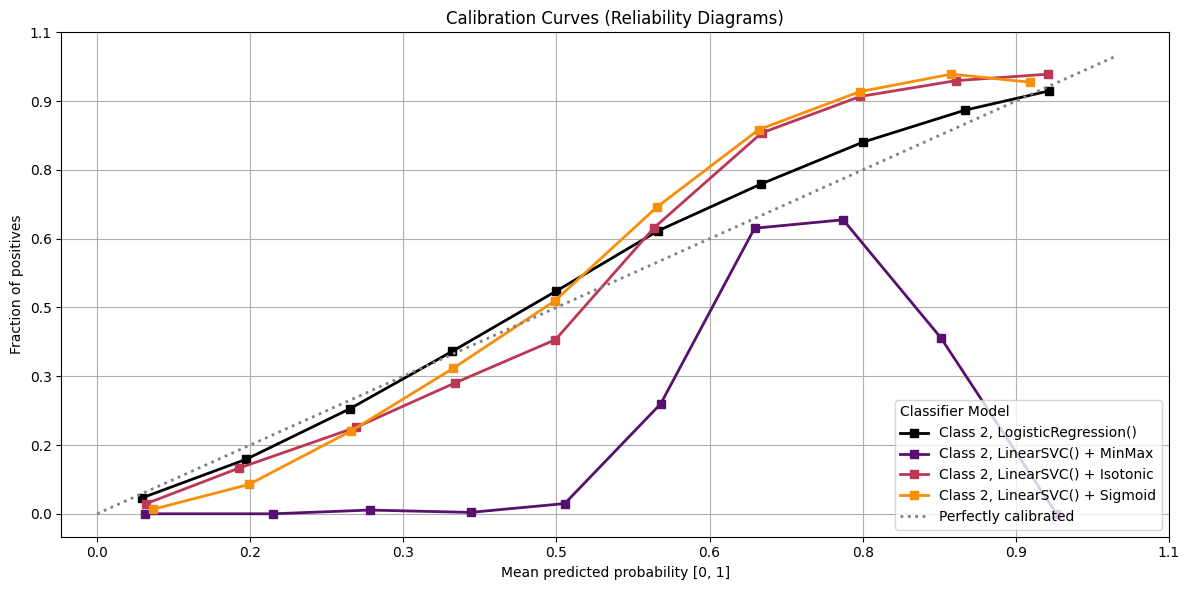

In [10]:
probas_dict = {
	LogisticRegression(): lr_probas,
	# GaussianNB(): nb_probas,
	'LinearSVC() + MinMax': svc_scores,
	'LinearSVC() + Isotonic': svc_isotonic,
	'LinearSVC() + Sigmoid': svc_sigmoid,
	# RandomForestClassifier(): rf_probas,
}
# Plot!
fig, ax = plt.subplots(figsize=(12, 6))
ax = sp.metrics.plot_calibration(
	y_val,
	y_probas_list=probas_dict.values(),
	estimator_names=probas_dict.keys(),
	to_plot_class_index=[2],
	ax=ax,
);

In [2]:
dir(sp)

['LowLevelCallable',
 'SpLogger',
 '_BUILT_WITH_MESON',
 '_Default',
 '_Deprecated',
 '_NoValue',
 '__all__',
 '__array_api_version__',
 '__bibtex__',
 '__builtins__',
 '__cached__',
 '__citation__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_hash__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_api',
 '_astropy',
 '_build_utils',
 '_citation',
 '_compat',
 '_config',
 '_docstring',
 '_externals',
 '_factory_api',
 '_globals',
 '_orig_rc_params',
 '_preprocess',
 '_seaborn',
 '_testing',
 '_tweedie',
 '_utils',
 '_xp_core_lib',
 'api',
 'cbook',
 'config_context',
 'decomposition',
 'estimators',
 'experimental',
 'get_config',
 'get_logger',
 'gpu_libraries',
 'kds',
 'metrics',
 'misc',
 'modelplotpy',
 'online_help',
 'plotters',
 'probscale',
 'set_config',
 'setup_module',
 'show_config',
 'show_versions',
 'sp_logger',
 'sp_logging',
 'stats',
 'test',
 'typing',
 'utils',
 'version',
 'visualkeras']

In [3]:
dir(sp._seaborn)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__git_hash__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_base',
 '_compat',
 '_core',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 '_stats',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_d

In [4]:
dir(sp._astropy), sp._astropy.__git_hash__

(['__author__',
  '__author_email__',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__git_hash__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'stats',
  'units',
  'utils'],
 '033a7edef2f1908853d8a5ffeea8b391aad71f4a')

In [6]:
dir(sp._astropy.stats)

['Events',
 'FitnessFunc',
 'PointMeasures',
 'RegularEvents',
 'RipleysKEstimator',
 'SigmaClip',
 'SigmaClippedStats',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bb',
 '_fast_sigma_clip',
 '_hist',
 '_stats',
 'akaike_info_criterion',
 'akaike_info_criterion_lsq',
 'bayesian_blocks',
 'bayesian_info_criterion',
 'bayesian_info_criterion_lsq',
 'binned_binom_proportion',
 'binom_conf_interval',
 'biweight',
 'biweight_location',
 'biweight_midcorrelation',
 'biweight_midcovariance',
 'biweight_midvariance',
 'biweight_scale',
 'bootstrap',
 'calculate_bin_edges',
 'cdf_from_intervals',
 'circcorrcoef',
 'circmean',
 'circmoment',
 'circstats',
 'circstd',
 'circvar',
 'fold_intervals',
 'freedman_bin_width',
 'funcs',
 'gaussian_fwhm_to_sigma',
 'gaussian_sigma_to_fwhm',
 'histogram',
 'histogram_intervals',
 'info_theory',
 'interval_overlap_length',
 'jackknife',
 'jackknife_resampling

In [5]:
sp._seaborn.__git_hash__

'86b5481ca47cb46d3b3e079a5ed9b9fb46e315ef'